# Metrics exercise 1: Churning

In this exercise we will analyze data from a cellular service provider. The company has thousands of customers and would like to predict which are likely to [churn](https://en.wikipedia.org/wiki/Customer_attrition) (to stop using the service) in the next three months.

We will use the given dataset of 50k prior customers and whether they churned:

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv('features_churn_matrix_ex1.csv')
df.head()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned
0,True,0.0,GRE,False,41.0,3.240370,False
1,True,1.0,ISR,False,29.0,2.121320,False
2,False,0.0,GRE,False,34.0,3.240370,False
3,False,1.0,ISR,False,29.0,3.240370,False
4,True,0.0,ISR,False,33.0,3.082207,False


## Part 1: Analysis

### Questions
**1.** Split the dataset into train and test datasets `X_train, X_test, y_train, y_test` using `sklearn.model_selection.train_test_split` with 20% test data. Note: make sure that `X_train` and `X_test` only contain numeric and boolean values.


In [3]:
# let's do one hot encoding to the counrty column to keep only numerical and boolean values
df = pd.get_dummies(df, columns=['country'], drop_first=True)
X = df.drop('churned', axis=1)
y = df['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())


       is_male  num_interactions_with_cust_service  late_on_payment   age  \
39087     True                                 1.0            False  28.0   
30893    False                                 4.0            False  24.0   
45278     True                                 0.0            False  30.0   
16398     True                                 0.0            False  33.0   
13653    False                                 1.0            False  23.0   

       years_in_contract  country_ISR  
39087           3.674235        False  
30893           0.707107         True  
45278           3.535534        False  
16398           3.535534        False  
13653           0.707107        False  


**2.** Train a Random Forest classifier `clf` (using `sklearn.ensemble.RandomForestClassifier`) to predict whether a customer will churn. Save the predictions on the test data in an array `y_pred`.


In [4]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


**3.** Print the confusion matrix and a classification report (`sklearn.metrics.classification_report`) for your model.


In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[7908  515]
 [1020  557]]

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      8423
        True       0.52      0.35      0.42      1577

    accuracy                           0.85     10000
   macro avg       0.70      0.65      0.67     10000
weighted avg       0.83      0.85      0.83     10000



**4.** What is the accuracy of the model on the test data? How well does it predict churn?


In [6]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8465


This means that the model correctly predicted the churn status (churned or not churned) for approximately 85% of the instances in the test dataset. 

**5.** Use `clf.predict_proba` to get the probabilities of churning predicted for the test data and save to an array `y_probs`. Note: `y_probs` should be of shape `(10000,)` (check with `y_probs.shape`)

In [7]:
y_probs = clf.predict_proba(X_test)[:, 1]
print("Shape of y_probs:", y_probs.shape)

Shape of y_probs: (10000,)



**6.** In `y_pred` we predicted churning if the probability of churning in `y_probs` is $\geq 0.5$. Instead we could use a different threshold $p$, predicting churning if the probability  of churning in `y_probs` is $\geq p$. Print a classification report and confusion matrix for the model using threshold $p = 0.2$. How do the predictions of this model compare to the model in question 4?


In [8]:
p = 0.2
y_pred_p = (y_probs >= p).astype(int)

class_report_p = classification_report(y_test, y_pred_p)
print("Classification Report with Threshold:", p)
print(class_report_p)

conf_matrix_p = confusion_matrix(y_test, y_pred_p)
print("\nConfusion Matrix with Threshold:", p)
print(conf_matrix_p)

print("\nClassification Report with Threshold: 0.5:")
print(class_report)


Classification Report with Threshold: 0.2
              precision    recall  f1-score   support

       False       0.92      0.80      0.86      8423
        True       0.37      0.62      0.47      1577

    accuracy                           0.78     10000
   macro avg       0.65      0.71      0.66     10000
weighted avg       0.83      0.78      0.80     10000


Confusion Matrix with Threshold: 0.2
[[6780 1643]
 [ 593  984]]

Classification Report with Threshold: 0.5:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      8423
        True       0.52      0.35      0.42      1577

    accuracy                           0.85     10000
   macro avg       0.70      0.65      0.67     10000
weighted avg       0.83      0.85      0.83     10000



**The first classification report and confusion matrix (threshold = 0.5):**

    Higher precision for True : threshold is bigger so we have less false positive
    Higher recall for false :
    Overall accuracy is bigger

**The second classification report and confusion matrix (threshold = 0.2):**

    higher precision for False.
    Higher recall for True.
    Overall accuracy is smaller

In summary, adjusting the threshold to 0.2 increases the recall for churning instances (True), but it comes at the cost of lower precision and overall accuracy compared to the original threshold of 0.5.

**7.** Plot the ROC and precision-recall curves for the model. What is the ROC AUC score? Hint: use `sklearn.metrics.roc_curve/precision_recall_curve/roc_auc_score`.


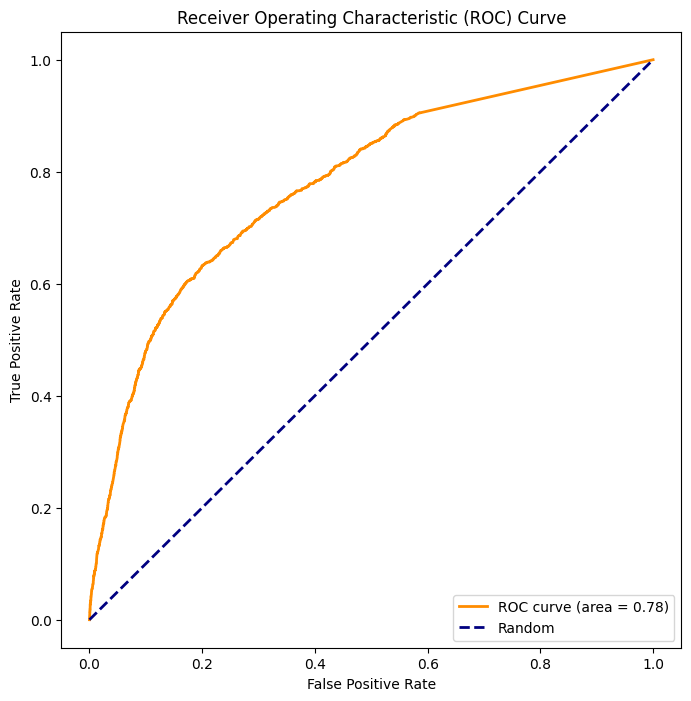

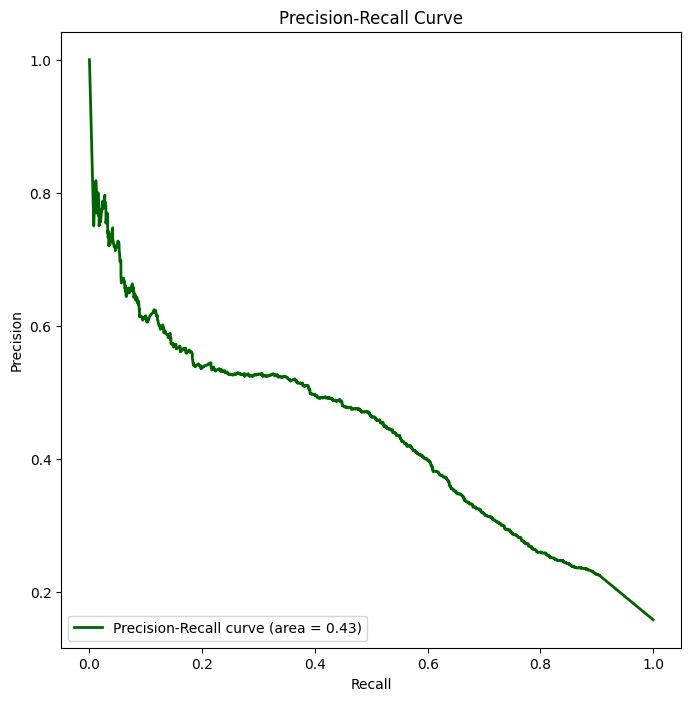

ROC AUC Score: 0.7786811875055099


In [13]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkgreen', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


**8.** What is the precision at 0.7 recall level? What value target_recall = 0.7
index_at_target_recall = (np.abs(recall - target_recall)).argmin()
precision_at_target_recall = precision[index_at_target_recall]
threshold_at_target_recall = _[index_at_target_recall]

print("Precision at {} recall level: {:.2f}".format(target_recall, precision_at_target_recall))
print("Threshold probability (p) at {} recall level: {:.2f}".format(target_recall, threshold_at_target_recall))
of threshold probability $p$ does this correspond to?

In [16]:
target_recall = 0.7
index_at_target_recall = (np.abs(recall - target_recall)).argmin()
precision_at_target_recall = precision[index_at_target_recall]
threshold_at_target_recall = _[index_at_target_recall]

print("Precision at {}, recall level: {:.2f}".format(target_recall, precision_at_target_recall))
print("Threshold probability (p) at {} recall level: {:.2f}".format(target_recall, threshold_at_target_recall))


Precision at 0.7 recall level: 0.32
Threshold probability (p) at 0.7 recall level: 0.14


## Part 2: Getting Down to Business

Now let's consider some business use cases.

**Business case A**: We want to predict customers who might churn soon, to focus attention on. We will target them with an email campaign to encourage them to keep using our service.

**Business case B**: We will instead target customers who are likely to churn with customer support attention and heavily discounted products. Each customer targeted will require a significant investment of time and money.

**Questions**:
**9.** What threshold value $p$ would you use for business case A? Why?


In this case, we are okkay with getting a bigger FPR because we will predict more customers who might churn and will send them an email, it is okkay to send too many emails. so we will use a lower threshold p, around 0.3

**10.** What threshold value $p$ would you use for business case B? Why?

In this case we prefer not to have a too big FPR, because we would spend too much money and time and customers who were predicted to churn soon but in reality are not. We will use a higher threshold, around 0.7